<h1 style="color:rgb(0,120,170)">Assignment 3: PCA and Kernel PCA</h1>

This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Theoretical aspects concerning PCA</h2>

Our aim is to discuss a certain aspect of the mathematical derivation of PCA, that has not been adressed in full detail in the lectures. We use the same notation as in the lecture, i.e. we are given a data matrix $\mathbf{X}= ( \mathbf{x}_1,...,\mathbf{x}_n )^\top$, where each $\mathbf{x}_i \in \mathbb{R}^m$ for $1\le i \le n$. 

A main reason, why PCA works very well, is the fact that the covariance matrix, defined as $\mathbf{C}=\frac 1n \mathbf{X}^T\mathbf{X}$, or equivalently, $c_{st}=\frac1n \sum_{i=1}^n x_{is} x_{it}$, is positive semi-definite. 
* Show this fact by proving $\left\langle\mathbf{C}\mathbf{a},\mathbf{a}  \right\rangle= \sum_{s,t=1}^m a_s a_t c_{st} \geq 0$ for any $\mathbf{a} \in \mathbb{R}^m$. 
* Moreover, show that positive semi-definiteness of $\mathbf{C}$ implies that all eigenvalues are non-negative. 
* Why is this an important fact in PCA? 

<h3 style="color:rgb(210,90,80)">Exercise 1 (20 points):</h3>

$$\left\langle\mathbf{C}\mathbf{a},\mathbf{a}  \right\rangle=(\mathbf{C}\mathbf{a})^T \cdot \mathbf{a}=\mathbf{a}^T\mathbf{C}^T\mathbf{a} = \mathbf{a}^T\mathbf{C}\mathbf{a}$$

Inserting the definition of the covariance matrix yields the following:<br>

$$\frac{1}{n}\mathbf{a}^T(\mathbf{X}^T\mathbf{X})^T\mathbf{a}=\frac{1}{n}\mathbf{a}^T\mathbf{X}^T\mathbf{X}\mathbf{a}=\frac{1}{n}(\mathbf{X}\mathbf{a})²$$

Since $(\mathbf{X}\mathbf{a})$ is a vector ($\mathbf{X}$: n x m, $\mathbf{a}$: m x 1 $\rightarrow \mathbf{X}\mathbf{a}$: n x 1), the transpose of said vector times the vector is the inner product of the vector itself:

$$(\mathbf{X}\mathbf{a})² = \left\langle \mathbf{X}\mathbf{a}, \mathbf{X}\mathbf{a} \right\rangle = \sum^{n}_{k=1} (\mathbf{x}_k a_k)²$$

Since this is obviously always $\geq 0$ and n is also $ > 0$, $\left\langle\mathbf{C}\mathbf{a},\mathbf{a}  \right\rangle$ is $\geq 0$ as well for every $\mathbf{a}$ and therefore $\mathbf{C}$ is positive-semidefinite.

<br><br>

Now let $\mathbf{v}$ be an eigenvector of $\mathbf{C}$. From above, we know that

$$\mathbf{v}^T\mathbf{C}\mathbf{v} \geq 0$$

Since $\mathbf{v}$ is an eigenvector, $\mathbf{C}\mathbf{v}=\lambda \mathbf{v}$ holds, which yields

$$\mathbf{v}^T\mathbf{C}\mathbf{v} = \mathbf{v}^T(\lambda \mathbf{v}) = \mathbf{v}^T \mathbf{v} \lambda$$

Now $\mathbf{v}^T \mathbf{v}$ is, as the inner product of the eigenvector with itself, neccessarily a positive real number (see above), for the inequality $\mathbf{v}^T\mathbf{C}\mathbf{v} = \mathbf{v}^T \mathbf{v} \lambda \geq 0$ to hold, $\lambda$ also has to be $\geq 0$. Therefore the eigenvalues of $\mathbf{C}$ are non-negative.

<br><br>

This is important for PCA, because the eigenvalues are representing the explained variance of the principial components (eigenvectors). Variance can't be negative, therefore, the eigenvalues shouldn't be negative in this case, as well.

<h2 style="color:rgb(0,120,170)">PCA applied to real world data set</h2>

We use the provided data set faces94.csv which is essentially based
on the pictures from the collection of Facial Images 1. This data set consists of $45 \times 50$
gray scale pixel images.
Let us first read in the data and plot the first image as an example.
This exercise should give you a feeling of what it really means to preserve variance.

In [160]:
#read data. Nothing to do here
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline 

# import data from csv file,
data = np.genfromtxt('faces94.csv', delimiter=',')

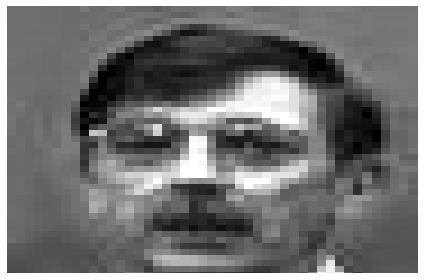

In [161]:
#plot first image as an example. Nothing to do here
def plotImg(x):
    fig, ax = plt.subplots()
    ax.pcolor(x.reshape(45, 50).T, cmap=cm.gray)
    ax.set_ylim([45, 0])
    ax.axis("off")
    fig.tight_layout()
    
# plot first img
plotImg(data[0, :])

<h3 style="color:rgb(210,90,80)">Exercise 2 (10 points):</h3>

We next use PCA for data-compression. Downproject the data using enough PCs to
explain $50 \% $, $75 \% $ and $99 \% $ of the variance. To do this use the sklearn-package. Print the number of principal components needed and also the explained variance for each of the tasks. 

In [162]:
########## YOUR SOLUTION HERE ##########

# if 0 < n_components < 1 and svd_solver == 'full', n_components will be chosen automatically such that
# the amount of explained variance is larger than specified 
pca_50 = PCA(n_components=0.5, svd_solver='full')
pca_75 = PCA(n_components=0.75, svd_solver='full')
pca_99 = PCA(n_components=0.99, svd_solver='full')

pca_50.fit(data)
pca_75.fit(data)
pca_99.fit(data)

print('Type\tPCs\tExplained Variance')
print(f'PCA50\t{pca_50.n_components_}\t{round(sum(pca_50.explained_variance_ratio_),2)}')
print(f'PCA75\t{pca_75.n_components_}\t{round(sum(pca_75.explained_variance_ratio_),2)}')
print(f'PCA99\t{pca_99.n_components_}\t{round(sum(pca_99.explained_variance_ratio_),2)}')

Type	PCs	Explained Variance
PCA50	4	0.51
PCA75	18	0.76
PCA99	367	0.99


<h3 style="color:rgb(0,120,170)">Exercise 3 (10 points):</h3>

You have essentially compressed vectors of dimension $d = 2250$ into vectors of much smaller dimension. Implement a function, that decompresses the data again, i.e. reconstruct the $2250$ dimensional data points, given the lower-dimensional representation. Print the dimension of the back-transformed data and the back-transformed data itself to check, if your result is indeed correct. 

In [163]:
########## YOUR SOLUTION HERE ##########

def decompress(X, pca):
    print(f'Dimension of given compressed data: {X.shape}')
    decompressed = pca.inverse_transform(X)
    print(f'Dimension of decompressed data: {decompressed.shape}')
    return decompressed

<h3 style="color:rgb(210,90,80)">Exercise 4 (15 points):</h3>

Plot a few of the images and their reconstructions with $50 \% $, $75 \% $ and $99 \% $ of the variance.

Dimension of given compressed data: (3059, 4)
Dimension of decompressed data: (3059, 2250)
Dimension of given compressed data: (3059, 18)
Dimension of decompressed data: (3059, 2250)
Dimension of given compressed data: (3059, 367)
Dimension of decompressed data: (3059, 2250)


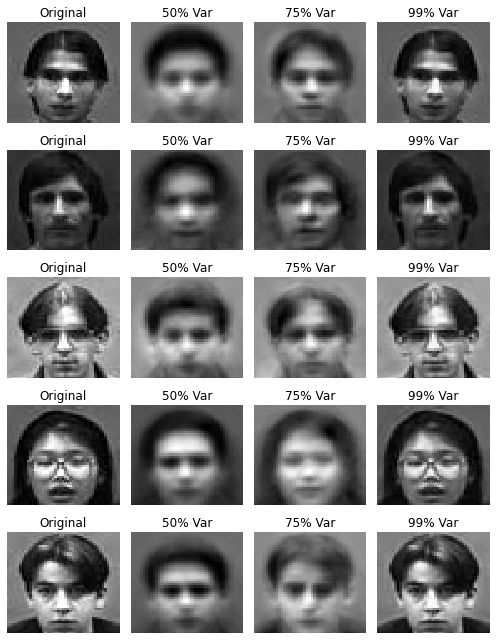

In [164]:
########## YOUR SOLUTION HERE ##########

data_50 = pca_50.transform(data)
data_75 = pca_75.transform(data)
data_99 = pca_99.transform(data)

data_decomp_50 = decompress(data_50, pca_50)
data_decomp_75 = decompress(data_75, pca_75)
data_decomp_99 = decompress(data_99, pca_99)

plot_list = [data, data_decomp_50, data_decomp_75, data_decomp_99]
title_list = ['Original', '50% Var', '75% Var', '99% Var']

fig, axs = plt.subplots(5,4)
fig.set_figheight(9)
fig.set_figwidth(7)
for n in range(5):
    idx = np.random.randint(0, len(data))
    for m in range(4):
        ax = axs[n,m]
        ax.pcolor(plot_list[m][idx,:].reshape(45, 50).T, cmap=cm.gray)
        ax.set_ylim([45, 0])
        ax.axis("off")
        ax.set_title(title_list[m])
        fig.tight_layout()

<h3 style="color:rgb(210,90,80)">Exercise 5 (5 points):</h3>

Comment on your observations. What type of information is preserved using the 3 different compression rates, what is lost?

########## YOUR SOLUTION HERE ##########

It is easy to observe, that only 50% and 75% explained variance lead to a very blurry picture after reconstruction. Nevertheless, it is still possible to identify every picture as a human face, even though we used only 4 and 18 PCs. By preserving 99% variance, on first sight there is no difference between the decompressed and the original picture. On second sight though, there is less noise and the decompressed picture is a little bit blurrier.

<h2 style="color:rgb(0,120,170)">PCA vs. Kernel PCA</h2>

Consider the two-dimensional data sets pca3.csv and pca4.csv
(the latter data set has as a third column as label, which should be used for coloring
the plots). First let us read the data, and for pca4 we additionally separate label from date:

In [165]:
#Read data. Nothing to do here!
data3 = np.genfromtxt('pca3.csv', delimiter = ',', skip_header = 0) 
data4 = np.genfromtxt('pca4.csv', delimiter = ',', skip_header = 0)

<h3 style="color:rgb(0,120,170)">Exercise 6 (10 Points):</h3>

* Perform PCA for data3 and data4, visualize the principal components together with the data and
determine the proportion of variance for each of the components.

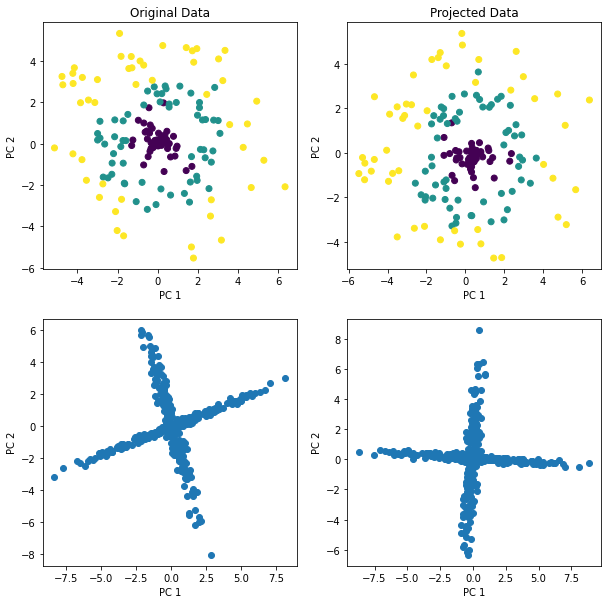

Proportion of explained variance per component

Data	PC-1	PC-2
3	0.59	0.41
4	0.51	0.43


In [170]:
########## YOUR SOLUTION HERE ##########

pca_3 = PCA()
pca_4 = PCA()

pca_3.fit(data3)
pca_4.fit(data4)

data3_pca = pca_3.transform(data3)
data4_pca = pca_4.transform(data4)

fig, axs = plt.subplots(2,2)
fig.set_figwidth(10)
fig.set_figheight(10)

axs[0,0].scatter(data4[:,0], data4[:,1], c=data4[:,2], cmap='viridis')
axs[0,0].set_title('Original Data')
axs[0,0].set_xlabel('PC 1')
axs[0,0].set_ylabel('PC 2')
axs[0,1].scatter(data4_pca[:,0], data4_pca[:,1], c=data4[:,2], cmap='viridis')
axs[0,1].set_title('Projected Data')
axs[0,1].set_xlabel('PC 1')
axs[0,1].set_ylabel('PC 2')

axs[1,0].scatter(data3[:,0], data3[:,1])
axs[1,0].set_xlabel('PC 1')
axs[1,0].set_ylabel('PC 2')
axs[1,1].scatter(data3_pca[:,0], data3_pca[:,1])
axs[1,1].set_xlabel('PC 1')
axs[1,1].set_ylabel('PC 2')

plt.show()

print('Proportion of explained variance per component\n')
print('Data\tPC-1\tPC-2')
print(f'3\t{round(pca_fitted_3.explained_variance_ratio_[0],2)}\t{round(pca_fitted_3.explained_variance_ratio_[1],2)}')
print(f'4\t{round(pca_fitted_4.explained_variance_ratio_[0],2)}\t{round(pca_fitted_4.explained_variance_ratio_[1],2)}')

<h3 style="color:rgb(0,120,170)">Exercise 7 (20 points):</h3>

* Perform Kernel PCA on both datasets. Try polynomial and RBF-kernels. For polynomial kernel use at least the parameters $\gamma=2$ and degree $3$, for RBF $\gamma=0.25$. You are of course allowed (and encourgaged) to try more different parameters and also different kernels to get a better feeling.

* Also visualize the projected data together with the original ones. 

* Finally, visualize the projection onto the first principal component in the RBF-kernel plots for data4 (can also be done together in one plot). This should also convince you about the fact that the first PC already contains a huge part of the information of the data, e.g. the data can already be well separated by the first PC. 

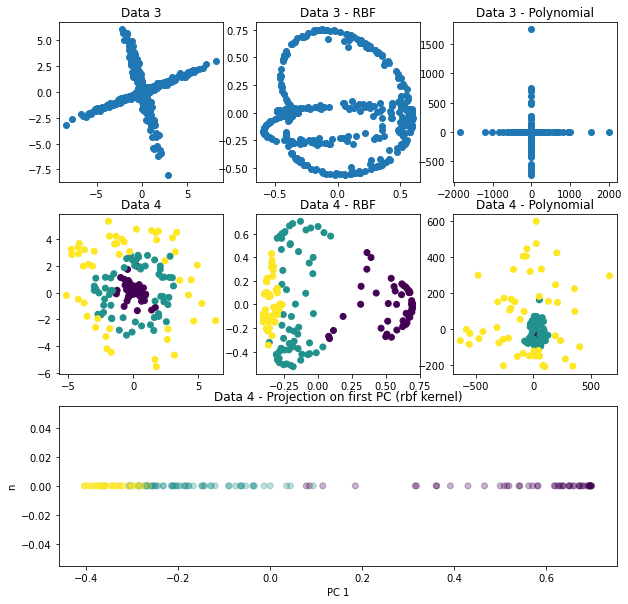

In [178]:
########## YOUR SOLUTION HERE ##########

import matplotlib.gridspec as gridspec

rbf_3 = KernelPCA(kernel='rbf', gamma=0.25)
pol_3 = KernelPCA(kernel='poly', degree=3, gamma=2)
rbf_4 = KernelPCA(kernel='rbf', gamma=0.25)
pol_4 = KernelPCA(kernel='poly', degree=3, gamma=2)

data3_rbf = rbf_3.fit_transform(data3)
data4_rbf = rbf_4.fit_transform(data4)
data3_pol = pol_3.fit_transform(data3)
data4_pol = pol_4.fit_transform(data4)
data_pca = [[data3, data3_rbf, data3_pol], [data4, data4_rbf, data4_pol]]
titles = [['Data 3', 'Data 3 - RBF', 'Data 3 - Polynomial'], ['Data 4', 'Data 4 - RBF', 'Data 4 - Polynomial']]

fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(3,3)

current_data = data_pca[0]
current_titles = titles[0]
for x in range(3):
    ax = fig.add_subplot(gs[0, x])
    ax.scatter(current_data[x][:,0], current_data[x][:,1])
    ax.set_title(current_titles[x])
    
current_data = data_pca[1]
current_titles = titles[1]
for x in range(3):
    ax = fig.add_subplot(gs[1, x])
    ax.scatter(current_data[x][:,0], current_data[x][:,1], c=data4[:,2], cmap='viridis')
    ax.set_title(current_titles[x])

ax = fig.add_subplot(gs[2, :])
ax.scatter(data4_rbf[:,0], [0]*len(data4_rbf), c=data4[:,2], cmap='viridis', alpha=0.3)
ax.set_title('Data 4 - Projection on first PC (rbf kernel)')
ax.set_xlabel('PC 1')
ax.set_ylabel('n')

plt.show()

<h3 style="color:rgb(0,120,170)">Exercise 8 (10 points):</h3>

Can you observe advantages/disadvantages of Kernel PCA compared to PCA without
using a kernel? For which kind of data do you observe them?


########## YOUR SOLUTION HERE ##########

For data4, a projection with normal PCA doesn't lead to a better possibility to linearly distiguish between the 3 classes, whereas for data3 this is the case (class 1: y = 0, class 2: y != 0). By applying a KernalPCA, a linear distiction between the 3 classes in data4 becomes possible, even when projecting only on one PC. In general, a KernelPCA seems useful when dealing with data which is not linearly seperable in the first place (like data4, data3 is pretty linear, appyling PCA only has the advantage to easier distiguish) and based on some non-linear distribution.